Firstly get all variables we are considering appended to a raw dataframe. 
Work on the 2visit first as its the largest.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os
import json
from preprocessing import impute_mmse

In [42]:



non_prog = pd.read_csv('Cohorts\\NonProgressors\\cleaned_20visit_nonprogressor.csv')
prog = pd.read_csv('Cohorts\\Progressors\\cleaned_20visit_progressors.csv')

# Read the CSV files and extract IDs
non_prog_ids = non_prog['NACCID'].tolist()
prog_ids = prog['NACCID'].tolist()
progvecs = prog.iloc[:, 1:].values
nonprogvecs = non_prog.iloc[:, 1:].values

# Create a new dataframe with IDs and labels
ids = non_prog_ids + prog_ids
labels = [0] * len(non_prog_ids) + [1] * len(prog_ids)
vectors = np.concatenate((nonprogvecs, progvecs), axis=0)

data = []
for id, label, vector in zip(ids, labels, vectors):
    for visit, value in enumerate(vector, start=1):
        data.append((id, visit, label, value))

df_combined = pd.DataFrame(data, columns=['ID', 'Visit', 'Prog_ID', 'Progression'])

# Set MultiIndex
#df_combined.set_index(['ID', 'Visit'], inplace=True)

# Print the DataFrame to verify
print(df_combined)

df_combined.to_csv('Cohorts\\20visit_combined.csv')

Empty DataFrame
Columns: [ID, Visit, Prog_ID, Progression]
Index: []


1-29-25
I am doing a check on some of these comborbidities to see if they just have one entry or have multiple, there is an issue with the add columns function converting everything to NaN so I'm going back and checking the dataset. 

In [4]:
# Create a dictionary to store the vectors for each ID
cohorts_dir = 'Cohorts'
for root, dirs, files in os.walk(cohorts_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            test_df = pd.read_csv(file_path)
            if 'ANYMEDS' in test_df.columns:
                continue
            uds_df = pd.read_csv('uds.csv')
            
            # Create dictionaries to store the vectors for each ID
            # naccfam_vectors = {}
            # cvhatt_vectors = {}
            # cvafib_vectors = {}
            # diabetes_vectors = {}
            # hypercho_vectors = {}
            # hyperten_vectors = {}
            # b12def_vectors = {}
            # depd_vectors = {}
            # anx_vectors = {}
            # nacctbi_vectors = {}
            anymeds_vectors = {}
            # Iterate through each unique ID in the test_df
            for id in test_df['ID'].unique():
                # Get the values for the current ID, ignoring -4 entries
                # naccfam_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'NACCFAM'].tolist() if v != -4]
                # cvhatt_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'CVHATT'].tolist() if v != -4]
                # cvafib_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'CVAFIB'].tolist() if v != -4]
                # diabetes_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'DIABETES'].tolist() if v != -4]
                # hypercho_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'HYPERCHO'].tolist() if v != -4]
                # hyperten_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'HYPERTEN'].tolist() if v != -4]
                # b12def_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'B12DEF'].tolist() if v != -4]
                # depd_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'DEPD'].tolist() if v != -4]
                # anx_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'ANX'].tolist() if v != -4]
                # nacctbi_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'NACCTBI'].tolist() if v != -4]
                anymeds_values = [v for v in uds_df.loc[uds_df['NACCID'] == id, 'ANYMEDS'].tolist() if v != -4]
                # Store the most frequent value in the dictionaries
                anymeds_vectors[id] = max(set(anymeds_values), key=anymeds_values.count) if anymeds_values else 0
                
                # naccfam_vectors[id] = max(set(naccfam_values), key=naccfam_values.count) if naccfam_values else 0
                # cvhatt_vectors[id] = max(set(cvhatt_values), key=cvhatt_values.count) if cvhatt_values else 0
                # cvafib_vectors[id] = max(set(cvafib_values), key=cvafib_values.count) if cvafib_values else 0
                # diabetes_vectors[id] = max(set(diabetes_values), key=diabetes_values.count) if diabetes_values else 0
                # hypercho_vectors[id] = max(set(hypercho_values), key=hypercho_values.count) if hypercho_values else 0
                # hyperten_vectors[id] = max(set(hyperten_values), key=hyperten_values.count) if hyperten_values else 0
                # b12def_vectors[id] = max(set(b12def_values), key=b12def_values.count) if b12def_values else 0
                # depd_vectors[id] = max(set(depd_values), key=depd_values.count) if depd_values else 0
                # anx_vectors[id] = max(set(anx_values), key=anx_values.count) if anx_values else 0
                # nacctbi_vectors[id] = max(set(nacctbi_values), key=nacctbi_values.count) if nacctbi_values else 0
                
            # Add new columns to the test_df DataFrame
            test_df['ANYMEDS'] = test_df['ID'].apply(lambda x: anymeds_vectors[x])
            # test_df['NACCFAM'] = test_df['ID'].apply(lambda x: naccfam_vectors[x])
            # test_df['CVHATT'] = test_df['ID'].apply(lambda x: cvhatt_vectors[x])
            # test_df['CVAFIB'] = test_df['ID'].apply(lambda x: cvafib_vectors[x])
            # test_df['DIABETES'] = test_df['ID'].apply(lambda x: diabetes_vectors[x])
            # test_df['HYPERCHO'] = test_df['ID'].apply(lambda x: hypercho_vectors[x])
            # test_df['HYPERTEN'] = test_df['ID'].apply(lambda x: hyperten_vectors[x])
            # test_df['B12DEF'] = test_df['ID'].apply(lambda x: b12def_vectors[x])
            # test_df['DEPD'] = test_df['ID'].apply(lambda x: depd_vectors[x])
            # test_df['ANX'] = test_df['ID'].apply(lambda x: anx_vectors[x])
            # test_df['NACCTBI'] = test_df['ID'].apply(lambda x: nacctbi_vectors[x])
            
            # Print the updated DataFrame to verify
            print(f"Updated DataFrame for {file}:")
            print(test_df.head())
            
            # Optionally, save the updated DataFrame back to CSV
            test_df.to_csv(file_path, index=False)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_18080\197921392.py:10: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  uds_df = pd.read_csv('uds.csv')


Updated DataFrame for 5visit_combined.csv:
   Unnamed: 0          ID  Prog_ID      Progression  SEX  EDUC  ALCOHOL  \
0           0  NACC004056        0  (0, 0, 0, 0, 0)    2    19        0   
1           1  NACC038334        0  (0, 0, 0, 0, 0)    2    18        0   
2           2  NACC061339        0  (0, 0, 0, 0, 0)    2    16        0   
3           3  NACC158860        0  (0, 0, 0, 0, 0)    2    99        0   
4           4  NACC222069        0  (0, 0, 0, 0, 0)    2    18        0   

                                  BMI                  MMSE              GDS  \
0     [888.8, 33.5, 33.2, 33.2, 32.8]  [97, 97, 97, 97, 30]  [1, 0, 0, 0, 2]   
1     [22.8, 888.8, 22.5, 22.3, 22.8]  [30, 29, 30, 30, 30]  [2, 1, 1, 5, 4]   
2      [21.4, 21.9, 20.8, 20.6, 21.5]  [30, 30, -4, -4, -4]  [1, 0, 0, 1, 1]   
3  [888.8, 27.2, 888.8, 888.8, 888.8]  [-4, -4, -4, -4, -4]  [1, 1, 1, 2, 1]   
4  [888.8, 888.8, 26.5, 888.8, 888.8]  [29, -4, -4, -4, -4]  [0, 0, 0, 1, 0]   

   ... DIABETES HYPERCHO 

C:\Users\Andrew\AppData\Local\Temp\ipykernel_18080\197921392.py:10: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  uds_df = pd.read_csv('uds.csv')


Updated DataFrame for 6visit_combined.csv:
   Unnamed: 0          ID  Prog_ID         Progression  SEX  EDUC  ALCOHOL  \
0           0  NACC090138        0  (0, 0, 0, 0, 0, 0)    2    12        0   
1           1  NACC096993        0  (0, 0, 0, 0, 0, 0)    2    16        0   
2           2  NACC109706        0  (0, 0, 0, 0, 0, 0)    1    12        0   
3           3  NACC121993        0  (0, 0, 0, 0, 0, 0)    1    16        0   
4           4  NACC205803        0  (0, 0, 0, 0, 0, 0)    2    13        0   

                                      BMI                      MMSE  \
0  [24.9, 23.6, 23.2, 888.8, -4.0, 888.8]  [30, 29, -4, -4, -4, -4]   
1   [888.8, 22.9, 21.2, 21.2, 21.2, 24.3]  [30, 30, 29, 29, 29, 29]   
2   [888.8, 29.0, 27.1, 24.1, 24.7, 26.4]  [30, 28, 30, 30, 30, 30]   
3   [888.8, 20.8, 20.6, 21.6, 21.1, 18.9]  [97, 97, 97, 97, 97, 97]   
4    [19.1, 19.1, 18.7, 18.5, 18.3, -4.0]  [97, 97, 28, -4, -4, -4]   

                   GDS  ... DIABETES HYPERCHO HYPERTEN B12DEF

C:\Users\Andrew\AppData\Local\Temp\ipykernel_18080\197921392.py:10: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  uds_df = pd.read_csv('uds.csv')


Updated DataFrame for 7visit_combined.csv:
   Unnamed: 0          ID  Prog_ID            Progression  SEX  EDUC  ALCOHOL  \
0           0  NACC037512        0  (0, 0, 0, 0, 0, 0, 0)    1    18        0   
1           1  NACC073844        0  (0, 0, 0, 0, 0, 0, 0)    1    18        0   
2           2  NACC122992        0  (0, 0, 0, 0, 0, 0, 0)    1    12        0   
3           3  NACC159991        0  (0, 0, 0, 0, 0, 0, 0)    1    18        0   
4           4  NACC164852        0  (0, 0, 0, 0, 0, 0, 0)    1    18        0   

                                           BMI                          MMSE  \
0   [21.5, 20.7, 21.0, 20.9, 21.0, -4.0, 21.4]  [30, 30, 30, 30, 30, -4, 30]   
1  [888.8, 23.7, 24.0, 24.5, 25.0, -4.0, 24.4]  [30, 30, 30, 30, 29, -4, -4]   
2   [32.8, 34.4, 33.3, 32.9, -4.0, 31.3, 29.5]  [29, 27, -4, -4, -4, -4, -4]   
3   [22.6, 22.1, 22.6, 26.3, 23.3, -4.0, 22.9]  [30, 30, 30, 29, 30, -4, -4]   
4   [29.6, 29.6, 31.0, 29.5, -4.0, 29.0, 28.3]  [-4, -4, -4, -4, -4, -

C:\Users\Andrew\AppData\Local\Temp\ipykernel_18080\197921392.py:10: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  uds_df = pd.read_csv('uds.csv')


Updated DataFrame for 8visit_combined.csv:
   Unnamed: 0          ID  Prog_ID               Progression  SEX  EDUC  \
0           0  NACC134016        0  (0, 0, 0, 0, 0, 0, 0, 0)    2    18   
1           1  NACC205485        0  (0, 0, 0, 0, 0, 0, 0, 0)    1    16   
2           2  NACC256391        0  (0, 0, 0, 0, 0, 0, 0, 0)    2    20   
3           3  NACC296437        0  (0, 0, 0, 0, 0, 0, 0, 0)    2    18   
4           4  NACC525841        0  (0, 0, 0, 0, 0, 0, 0, 0)    1    12   

   ALCOHOL                                                BMI  \
0        0  [888.8, 22.8, 888.8, 26.2, 888.8, 26.9, 28.3, ...   
1        0  [27.1, 888.8, -4.0, 28.9, 888.8, 26.7, 888.8, ...   
2        0  [20.2, 21.5, 21.6, 21.8, 23.4, 21.8, 888.8, 24.5]   
3        0  [888.8, 30.2, 29.6, 33.0, 32.0, 33.0, -4.0, 28.5]   
4        0   [23.5, 22.3, 23.2, 23.3, -4.0, 22.6, 22.1, 21.9]   

                               MMSE                          GDS  ...  \
0  [30, 29, 28, 28, 30, 30, 27, -4]    [0,

C:\Users\Andrew\AppData\Local\Temp\ipykernel_18080\197921392.py:10: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  uds_df = pd.read_csv('uds.csv')


Updated DataFrame for 9visit_combined.csv:
   Unnamed: 0          ID  Prog_ID                  Progression  SEX  EDUC  \
0           0  NACC062239        0  (0, 0, 0, 0, 0, 0, 0, 0, 0)    2    18   
1           1  NACC072185        0  (0, 0, 0, 0, 0, 0, 0, 0, 0)    2    18   
2           2  NACC077465        0  (0, 0, 0, 0, 0, 0, 0, 0, 0)    2    16   
3           3  NACC198211        0  (0, 0, 0, 0, 0, 0, 0, 0, 0)    2    18   
4           4  NACC217214        0  (0, 0, 0, 0, 0, 0, 0, 0, 0)    1    20   

   ALCOHOL                                                BMI  \
0        0  [23.7, 25.4, 24.8, 25.2, -4.0, 25.3, 26.0, 25....   
1        0  [19.8, 20.1, 21.3, 20.4, 20.1, -4.0, 19.9, 19....   
2        0  [22.9, 26.7, 21.6, 22.9, 888.8, -4.0, 888.8, 2...   
3        0  [20.5, 20.6, 20.6, 20.0, -4.0, -4.0, 19.3, 19....   
4        0  [24.1, 888.8, -4.0, 24.7, 23.9, 22.0, -4.0, 23...   

                                   MMSE                            GDS  ...  \
0  [30, 30, 30, 30

In [ ]:
cohorts_dir = 'Cohorts'
for root, dirs, files in os.walk(cohorts_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            test_df = pd.read_csv(file_path)
            
            # smokyrs_vectors = {}
            # race_vectors = {}
            hearing_vectors = {}
            hearaid_vectors = {}
            hearwaid_vectors = {}
            vision_vectors = {}
            viscorr_vectors = {}
            viswcorr_vectors = {}
            
            uds_df = pd.read_csv('uds.csv')
            # Iterate through each unique ID in the uds_df
            for id in test_df['ID'].unique():
                hearing_values = uds_df.loc[uds_df['NACCID'] == id, 'HEARING'].tolist()
                hearaid_values = uds_df.loc[uds_df['NACCID'] == id, 'HEARAID'].tolist()
                hearwaid_values = uds_df.loc[uds_df['NACCID'] == id, 'HEARWAID'].tolist()
                vision_values = uds_df.loc[uds_df['NACCID'] == id, 'VISION'].tolist()
                viscorr_values = uds_df.loc[uds_df['NACCID'] == id, 'VISCORR'].tolist()
                viswcorr_values = uds_df.loc[uds_df['NACCID'] == id, 'VISWCORR'].tolist()
                hearing_vectors[id] = hearing_values
                hearaid_vectors[id] = hearaid_values
                hearwaid_vectors[id] = hearwaid_values
                vision_vectors[id] = vision_values
                viscorr_vectors[id] = viscorr_values
                viswcorr_vectors[id] = viswcorr_values
                
                # Get the values for the current ID
                # smokyrs_values = uds_df.loc[uds_df['NACCID'] == id, 'SMOKYRS'].tolist()
                # Note here is where the previous repeated vars were. 
                # Store the values in the dictionary
                # smokyrs_vectors[id] = smokyrs_values
            #     race_values = uds_df.loc[uds_df['NACCID'] == id, 'RACE'].tolist()
            #     race_vectors[id] = race_values
            # test_df['RACE'] = test_df['ID'].apply(lambda x: max(race_vectors[x]) if race_vectors[x] else np.nan)                 
               
               
                
            # Add new columns to the test_df DataFrame
            # if 'SMOKYRS' in test_df.columns:
            #     # drop the existing column
            #     test_df.drop('SMOKYRS', axis=1, inplace=True)
            #     test_df['SMOKYRS'] = test_df['ID'].apply(lambda x: max(smokyrs_vectors[x]) if smokyrs_vectors[x] else np.nan)
            # else:
            #     test_df['SMOKYRS'] = test_df['ID'].apply(lambda x: max(smokyrs_vectors[x]) if smokyrs_vectors[x] else np.nan)
            # test_df['GDS'] = test_df['ID'].apply(lambda x: gds_vectors[x])
            # test_df['CDR'] = test_df['ID'].apply(lambda x: cdr_vectors[x])
            # test_df['TOBAC30'] = test_df['ID'].apply(lambda x: tobac_vectors[x])
            # test_df['BILLS'] = test_df['ID'].apply(lambda x: bills_vectors[x])
            # test_df['TAXES'] = test_df['ID'].apply(lambda x: taxes_vectors[x])
            # test_df['SHOPPING'] = test_df['ID'].apply(lambda x: shopping_vectors[x])
            # test_df['GAMES'] = test_df['ID'].apply(lambda x: games_vectors[x])
            # test_df['STOVE'] = test_df['ID'].apply(lambda x: stove_vectors[x])
            # test_df['MEALPREP'] = test_df['ID'].apply(lambda x: mealprep_vectors[x])
            # test_df['EVENTS'] = test_df['ID'].apply(lambda x: events_vectors[x])
            # test_df['PAYATTN'] = test_df['ID'].apply(lambda x: payattn_vectors[x])
            # test_df['REMDATES'] = test_df['ID'].apply(lambda x: remdates_vectors[x])
            # test_df['TRAVEL'] = test_df['ID'].apply(lambda x: travel_vectors[x])
            test_df['HEARING'] = test_df['ID'].apply(lambda x: hearing_vectors[x])
            test_df['HEARAID'] = test_df['ID'].apply(lambda x: hearaid_vectors[x])
            test_df['HEARWAID'] = test_df['ID'].apply(lambda x: hearwaid_vectors[x])
            test_df['VISION'] = test_df['ID'].apply(lambda x: vision_vectors[x])
            test_df['VISCORR'] = test_df['ID'].apply(lambda x: viscorr_vectors[x])
            test_df['VISWCORR'] = test_df['ID'].apply(lambda x: viswcorr_vectors[x])
            
            # Print the updated DataFrame to verify
            print(f"Updated DataFrame for {file}:")
            print(test_df.head())
            
            # Optionally, save the updated DataFrame back to CSV
            test_df.to_csv(file_path, index=False)

Recoding comorbidities to binary, remote/inactive and unknown are getting recoded to 0: Absent

Original stats: {'0': 111400, '1': 28443, '2': 2073, '9': 2094, '-4': 0}

Update (sucessful): {'0': 115567, '1': 28443, '2': 0, '9': 0, '-4': 0}

In [22]:
cohorts_dir = 'Cohorts'
response_counts = {'0': 0, '1': 0, '-4': 0}
overlaps = []
for root, dirs, files in os.walk(cohorts_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            comorbidities = df.iloc[:, 22:32].values
            for index, row in df.iterrows():
                response_counts[str(row['ANYMEDS'])] += 1
                if row['ANYMEDS'] == 0 and any(row.iloc[22:32] == 1):
                    overlaps.append(row['ID'])

print(response_counts)
print(len(overlaps))


{'0': 977, '1': 13424, '-4': 0}
740


In [10]:
dir = 'Cohorts'
years = []
for root, dirs, files in os.walk(dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            df.loc[df['EDUC'] == '', 'EDUC'] = np.nan
            df.to_csv(file_path, index=False)
            education_counts = df['EDUC'].value_counts().sort_index()
            print(education_counts)
# Print the counts


EDUC
7.0       2
8.0       3
9.0       1
10.0      3
11.0      2
12.0     49
13.0     18
14.0     36
15.0     12
16.0    102
17.0     16
18.0    108
19.0     15
20.0     36
21.0      1
22.0      2
23.0      2
25.0      3
Name: count, dtype: int64
EDUC
7.0      1
10.0     2
11.0     1
12.0    30
13.0    19
14.0    39
15.0     6
16.0    97
17.0    14
18.0    88
19.0    14
20.0    32
21.0     6
22.0     3
Name: count, dtype: int64
EDUC
8.0      1
10.0     2
11.0     3
12.0    17
13.0    16
14.0    25
15.0    11
16.0    72
17.0    12
18.0    74
19.0    11
20.0    36
21.0     3
22.0     1
23.0     2
24.0     1
Name: count, dtype: int64
EDUC
9.0      1
10.0     3
11.0     1
12.0    35
13.0    11
14.0    35
15.0     3
16.0    50
17.0     5
18.0    51
19.0     6
20.0    31
22.0     1
Name: count, dtype: int64
EDUC
8.0      1
10.0     1
11.0     2
12.0    10
13.0     5
14.0    15
15.0     5
16.0    43
17.0     7
18.0    32
19.0     5
20.0    18
21.0     1
Name: count, dtype: int64
EDUC
6.0     

2-17-25 Today I am working on imputing values for MMSE, BMI. for BMI I am going to try a nan and then imputing the median. First I am going to run statistics on missing values, I may want to use a Last value carried forward or interpoaltion for mmse. 

In [ ]:

bmi = []
file_path = 'Cohorts\\10visit_combined.csv'
def convert_to_real_nan(row):
    try:
        # Ensure it's a valid list format
        row = row.replace("nan", "null")  # Replace 'nan' string with 'null' for JSON compatibility
        values = json.loads(row)  # Parse JSON-formatted string into a list

        # Convert 'None' (from JSON) into np.nan for numerical operations
        return [np.nan if x is None else float(x) for x in values]
    
    except (ValueError, TypeError, json.JSONDecodeError):
        return row  # If it can't be converted, return the original

def impute_bmi(values):
    if isinstance(values, list):  # Ensure we are working with a list
        valid_values = [x for x in values if not pd.isna(x)]
        print(valid_values)
        if valid_values:  # Only compute mean if there's at least one valid number
            avg_value = round(sum(valid_values) / len(valid_values), 1)  # Round to 1 decimal place
            return [round(avg_value, 1) if pd.isna(x) else round(x, 1) for x in values]
    return values  # Return as-is if not a list
df = pd.read_csv(file_path)
df['BMI'] = df['BMI'].apply(convert_to_real_nan)
df['BMI'] = df['BMI'].apply(impute_bmi)
df.to_csv(file_path, index=False)

[27.1, 26.4, 27.8, 27.8, 26.4, 27.1, 27.25, 26.4, 29.0, 27.25]
[27.1, 24.0125, 21.0, 24.6, 25.6, 23.2, 23.7, 23.7, 24.0125, 23.2]
[26.4, 26.4, 27.3, 27.9, 30.0, 27.67142857142857, 28.7, 27.0, 27.67142857142857, 27.67142857142857]
[27.5, 30.8, 28.7, 30.0, 28.242857142857144, 28.0, 25.9, 26.8, 28.242857142857144, 28.242857142857144]
[28.0, 26.6, 27.0, 28.6, 27.514285714285712, 26.6, 28.4, 27.4, 27.514285714285712, 27.514285714285712]
[23.0, 24.1, 22.1, 22.5, 25.4, 23.53333333333333, 24.1, 23.53333333333333, 23.53333333333333, 23.53333333333333]
[27.1, 26.6, 26.2, 27.2, 27.8, 27.0125, 27.2, 27.0125, 27.7, 26.3]
[26.6, 27.4, 28.8, 28.2, 27.1, 27.37777777777778, 28.5, 27.3, 26.7, 25.8]
[32.3, 26.5, 26.2, 26.7, 25.6, 25.2, 26.0, 26.5125, 26.5125, 23.6]
[25.5, 26.0, 26.3, 25.6, 26.5, 25.98, 25.98, 25.98, 25.98, 25.98]
[25.9, 25.0, 25.5, 25.3, 25.0, 25.599999999999998, 25.599999999999998, 26.0, 26.2, 25.9]
[32.1, 32.7, 33.2, 31.4, 34.1, 32.733333333333334, 32.9, 32.733333333333334, 32.73333333

3-12-25 I am going to attempt median imputation for BMI entries, and keep nan only for totally incomplete entries. 

In [53]:
dir = 'Cohorts'
bmi = []
def convert_to_real_nan(row):
    try:
        # Ensure it's a valid list format
        row = row.replace("nan", "null")  # Replace 'nan' string with 'null' for JSON compatibility
        values = json.loads(row)  # Parse JSON-formatted string into a list

        # Convert 'None' (from JSON) into np.nan for numerical operations
        return [np.nan if x is None else float(x) for x in values]
    
    except (ValueError, TypeError, json.JSONDecodeError):
        return row  # If it can't be converted, return the original

def impute_bmi(values):
    if isinstance(values, list):  # Ensure we are working with a list
        valid_values = [x for x in values if not pd.isna(x)]
        print(valid_values)
        if valid_values:  # Only compute mean if there's at least one valid number
            avg_value = round(sum(valid_values) / len(valid_values), 1)  # Round to 1 decimal place
            return [round(avg_value, 1) if pd.isna(x) else round(x, 1) for x in values]
    return values  # Return as-is if not a list

for root, dirs, files in os.walk(dir):
    for file in files:
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        df['BMI'] = df['BMI'].apply(convert_to_real_nan)
        df['BMI'] = df['BMI'].apply(impute_bmi)
        df.to_csv(file_path, index=False)
            

[27.1, 26.4, 27.8, 27.8, 26.4, 27.1, 26.4, 29.0]
[27.1, 21.0, 24.6, 25.6, 23.2, 23.7, 23.7, 23.2]
[26.4, 26.4, 27.3, 27.9, 30.0, 28.7, 27.0]
[27.5, 30.8, 28.7, 30.0, 28.0, 25.9, 26.8]
[28.0, 26.6, 27.0, 28.6, 26.6, 28.4, 27.4]
[23.0, 24.1, 22.1, 22.5, 25.4, 24.1]
[27.1, 26.6, 26.2, 27.2, 27.8, 27.2, 27.7, 26.3]
[26.6, 27.4, 28.8, 28.2, 27.1, 28.5, 27.3, 26.7, 25.8]
[32.3, 26.5, 26.2, 26.7, 25.6, 25.2, 26.0, 23.6]
[25.5, 26.0, 26.3, 25.6, 26.5]
[25.9, 25.0, 25.5, 25.3, 25.0, 26.0, 26.2, 25.9]
[32.1, 32.7, 33.2, 31.4, 34.1, 32.9]
[23.8, 24.4, 25.8, 24.8, 24.7, 24.1, 23.5, 22.7, 24.3]
[24.1, 24.3, 23.3, 24.3, 23.9, 23.4, 23.9]
[30.0, 29.8, 31.2, 32.0, 33.2, 36.9, 35.3, 29.0, 29.3]
[23.7, 24.7, 25.7, 25.8, 25.8, 26.1, 26.5, 25.8, 22.7]
[28.6, 29.9, 25.7, 24.4, 24.9, 24.4, 27.4]
[32.7, 30.4, 32.2, 32.6, 31.8, 31.8, 32.4]
[31.9, 29.4, 29.4, 30.4, 30.4, 30.0, 31.9, 31.9, 33.1, 32.8]
[34.4, 34.7, 34.7, 34.1, 34.4, 33.7, 31.4, 34.2, 35.3]
[28.4, 27.5, 27.3, 27.3, 27.3, 27.3, 26.5, 27.7, 27.3]
[

3-14-25 Dropping the ANYMEDS column

In [3]:
dir = 'Cohorts'
for root, dirs, files in os.walk(dir):
    for file in files:
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        if 'ANYMEDS' in df.columns:
            df.drop('ANYMEDS', axis=1, inplace=True)
        df.to_csv(file_path, index=False)

### MMSE Stringency Analysis
3-14-25 Looking to get a picture of how many entries for each cohort are missing 1,2... all MMSE entries for recorded visits


In [10]:
dir = 'Cohorts'
def process_mmse(row):
                try:
                    # Convert to a list of integers if not already
                    if isinstance(row, str):
                        row = ast.literal_eval(row)
                    row = [int(x) if not pd.isna(x) else np.nan for x in row]
                except (ValueError, SyntaxError):
                    return row  # Return as-is if parsing fails
                
                # Replace invalid values with np.nan
                invalid_values = {-4, 88, 95, 96, 97, 98}
                return [np.nan if x in invalid_values else x for x in row]
            
for root, dirs, files in os.walk(dir):
    for file in files:
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        df['MMSE'] = df['MMSE'].apply(process_mmse)
        
        stringency_counts = {}
        for row in df['MMSE']:
            if isinstance(row, list):
                valid_count = sum(1 for x in row if not pd.isna(x))
                stringency_counts[valid_count] = stringency_counts.get(valid_count, 0) + 1
            
        # Print stringency analysis results for the file
        print(f"File: {file}")
        for valid_count, count in sorted(stringency_counts.items()):
            if valid_count == 0:
                print(f"All NaN: {count}")
            else:
                print(f"{valid_count} valid entries: {count}")
        df.to_csv(file_path, index=False)

File: 10visit_combined.csv
All NaN: 11
1 valid entries: 31
2 valid entries: 61
3 valid entries: 59
4 valid entries: 32
5 valid entries: 32
6 valid entries: 29
7 valid entries: 30
8 valid entries: 42
9 valid entries: 41
10 valid entries: 43
File: 11visit_combined.csv
All NaN: 8
1 valid entries: 4
2 valid entries: 46
3 valid entries: 61
4 valid entries: 42
5 valid entries: 23
6 valid entries: 19
7 valid entries: 32
8 valid entries: 33
9 valid entries: 36
10 valid entries: 13
11 valid entries: 38
File: 12visit_combined.csv
All NaN: 8
1 valid entries: 1
2 valid entries: 7
3 valid entries: 44
4 valid entries: 44
5 valid entries: 28
6 valid entries: 28
7 valid entries: 24
8 valid entries: 35
9 valid entries: 23
10 valid entries: 9
11 valid entries: 11
12 valid entries: 25
File: 13visit_combined.csv
All NaN: 2
2 valid entries: 1
3 valid entries: 16
4 valid entries: 25
5 valid entries: 31
6 valid entries: 28
7 valid entries: 37
8 valid entries: 26
9 valid entries: 24
10 valid entries: 7
11 val

In [12]:
import re

# Filepath to the stringency analysis text file
file_path = 'c:\\Users\\Andrew\\Desktop\\AGE\\mmse_stringency.txt'

# Dictionary to store results
results = {}

# Read the file and process each file's data
with open(file_path, 'r') as f:
    current_file = None
    total_rows = 0
    valid_rows = 0

    for line in f:
        # Check if the line indicates a new file
        if line.startswith("File:"):
            # If we were processing a file, calculate the percentage for the previous file
            if current_file is not None:
                percentage = (valid_rows / total_rows) * 100 if total_rows > 0 else 0
                results[current_file] = percentage

            # Start processing a new file
            current_file = line.split(":")[1].strip()
            total_rows = 0
            valid_rows = 0

        # Check for valid entries in the current file
        match = re.match(r"(\d+|All NaN) valid entries: (\d+)", line)
        if match:
            valid_count = match.group(1)
            count = int(match.group(2))

            # Update total rows
            total_rows += count

            # Check if the valid count meets the "at least half" condition
            if valid_count != "All NaN":
                valid_count = int(valid_count)
                if current_file:
                    # Extract the number of visits from the file name
                    visits = int(re.search(r"(\d+)visit", current_file).group(1))
                    threshold = visits // 2  # Half of the visits

                    if valid_count >= threshold:
                        valid_rows += count

    # Calculate percentage for the last file
    if current_file is not None:
        percentage = (valid_rows / total_rows) * 100 if total_rows > 0 else 0
        results[current_file] = percentage

# Print the results
for file, percentage in results.items():
    print(f"{file}: {percentage:.2f}% of rows have at least half of their entries intact.")

10visit_combined.csv: 54.25% of rows have at least half of their entries intact.
11visit_combined.csv: 55.91% of rows have at least half of their entries intact.
12visit_combined.csv: 55.56% of rows have at least half of their entries intact.
13visit_combined.csv: 68.53% of rows have at least half of their entries intact.
14visit_combined.csv: 65.28% of rows have at least half of their entries intact.
15visit_combined.csv: 78.70% of rows have at least half of their entries intact.
16visit_combined.csv: 78.72% of rows have at least half of their entries intact.
17visit_combined.csv: 92.00% of rows have at least half of their entries intact.
18visit_combined.csv: 95.24% of rows have at least half of their entries intact.
19visit_combined.csv: 100.00% of rows have at least half of their entries intact.
2visit_combined.csv: 100.00% of rows have at least half of their entries intact.
3visit_combined.csv: 100.00% of rows have at least half of their entries intact.
4visit_combined.csv: 91.62%

3-25 Final pre processing Tasks, MMSE, BMI, converting all other values to NaN, and dropping hearing and vision 

In [10]:
starting_dir = 'Cohorts'
destination_dir = 'Cohorts_Cleaned'
bmi_dropped_values = {}
mmse_dropped_values = {}
gds_cleaned = {}

def convert_to_real_nan(row):
    try:
        # Ensure it's a valid list format
        row = row.replace("nan", "null")  # Replace 'nan' string with 'null' for JSON compatibility
        values = json.loads(row)  # Parse JSON-formatted string into a list

        # Convert 'None' (from JSON) into np.nan for numerical operations
        return [np.nan if x is None else float(x) for x in values]
    
    except (ValueError, TypeError, json.JSONDecodeError):
        return row  # If it can't be converted, return the original
    
def clean_gds_column(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 88] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_tobaco(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_faq(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9, 8] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
    
    
for root, dirs, files in os.walk(starting_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            
            # Convert columns to real lists of floats
            df['BMI'] = df['BMI'].apply(convert_to_real_nan)
            df['MMSE'] = df['MMSE'].apply(convert_to_real_nan)
            
            # Count rows where all BMI entries are NaN
            initial_count = len(df)
            df = df[df['BMI'].apply(lambda x: not all(pd.isna(x)) if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            bmi_dropped_values[file] = dropped_count
            ### Repeat for MMSE
            # First fully remove missing entries from 2,3 visits.
            if file in ['2visit_combined.csv', '3visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: all(not pd.isna(val) for val in x) if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow one missing entry for 4,5 visits.
            elif file in ['4visit_combined.csv', '5visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 1 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow two missing entries for 6,7 visits.
            elif file in ['6visit_combined.csv', '7visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 2 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow three missing entries for 8,9 visits.
            elif file in ['8visit_combined.csv', '9visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow four missing entries for 10 visits.
            elif file in ['10visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 4 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Convert all 88 and -4 entries in each row of GDS column to NAN
            df['GDS'] = df['GDS'].apply(clean_gds_column)
            #Clean tobac 30
            df['TOBAC30'] = df['TOBAC30'].apply(clean_tobaco)
            #Clean FAQ
            for col in df.columns[12:22]:  # Columns 13-22 (0-based index)
                df[col] = df[col].apply(clean_faq)
            ### Hearing and Vision Cleaning
            # Drop columns HEARING, HEARWAID, HEARAID, VISION, VISCORR, VISWCORR 
        
            df.drop(columns=['HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR'], inplace=True, errors='ignore')
            # drop first column
            df.drop(df.columns[0], axis=1, inplace=True)
            
            # Save the cleaned DataFrame to the destination directory
            os.makedirs(destination_dir, exist_ok=True)
            cleaned_file_path = os.path.join(destination_dir, file)
            df.to_csv(cleaned_file_path, index=False)

# Print the dropped values summary
print("Dropped values summary:")
for file, count in bmi_dropped_values.items():
    print(f"{file}: {count} rows dropped for BMI")
for file, count in mmse_dropped_values.items():
    print(f"{file}: {count} rows dropped for MMSE")
    #print("100 dropped for MMSE")

Dropped values summary:
10visit_combined.csv: 5 rows dropped for BMI
11visit_combined.csv: 6 rows dropped for BMI
12visit_combined.csv: 8 rows dropped for BMI
13visit_combined.csv: 2 rows dropped for BMI
14visit_combined.csv: 1 rows dropped for BMI
15visit_combined.csv: 0 rows dropped for BMI
16visit_combined.csv: 0 rows dropped for BMI
17visit_combined.csv: 0 rows dropped for BMI
18visit_combined.csv: 0 rows dropped for BMI
19visit_combined.csv: 0 rows dropped for BMI
2visit_combined.csv: 187 rows dropped for BMI
3visit_combined.csv: 76 rows dropped for BMI
4visit_combined.csv: 39 rows dropped for BMI
5visit_combined.csv: 27 rows dropped for BMI
6visit_combined.csv: 24 rows dropped for BMI
7visit_combined.csv: 11 rows dropped for BMI
8visit_combined.csv: 14 rows dropped for BMI
9visit_combined.csv: 12 rows dropped for BMI
10visit_combined.csv: 221 rows dropped for MMSE
2visit_combined.csv: 2043 rows dropped for MMSE
3visit_combined.csv: 1278 rows dropped for MMSE
4visit_combined.csv: 

4-2-25 
After realizing we may need to only use one cohort, e.g. 5 visit or 6 visit I need to go back and make another preprocessing function. 
1. Look at class distribution for CN to MCI vs MCI to AD by checking progID and counting them. Use these values for SMOTE processing later.

In [ ]:
def progressor_class(file_path):
    
    df = pd.read_csv(file_path)
    # Check if the DataFrame contains the 'Prog_ID' column
    if 'Prog_ID' in df.columns:
        # Count the number of unique values in the 'Prog_ID' column
        progressors = df['Prog_ID'] == 1
        non_progressors = df['Prog_ID'] == 0
        
        print(f"File: {file_path} - Progressors: {progressors.sum()}, Non-Progressors: {non_progressors.sum()}")
    mci_count = 0
    cn_to_mci = 0
    mci_to_ad = 0
    for ids, progression in enumerate(df['Progression']):
        if isinstance(progression, str):
            # Convert the string representation of the list to an actual list
            progression = eval(progression)
        if all(val == 1 for val in progression):
            mci_count += 1
        # CN to MCI 
        if progression[0] == 0 in progression and df.loc[ids, 'Prog_ID'] == 1:
            cn_to_mci += 1
        # MCI to AD
        if progression[0] == 1 in progression and df.loc[ids, 'Prog_ID'] == 1:
            mci_to_ad += 1
    print(f"Stable Mci in {file_path} : {mci_count}")
    print (f"Stable CN in {file_path} : {non_progressors.sum() - mci_count}")
    print (f"CN to MCI in {file_path} : {cn_to_mci}")
    print (f"MCI to AD in {file_path} : {mci_to_ad}")
        

file1 = 'Raw_Cohorts\\7visit_combined.csv'
file2 = 'Raw_Cohorts\\8visit_combined.csv'
file3 = 'Raw_Cohorts\\9visit_combined.csv'
progressor_class(file1)
progressor_class(file2)
progressor_class(file3)
    

File: Raw_Cohorts\7visit_combined.csv - Progressors: 131, Non-Progressors: 790
Stable Mci in Raw_Cohorts\7visit_combined.csv : 6
Stable CN in Raw_Cohorts\7visit_combined.csv : 784
CN to MCI in Raw_Cohorts\7visit_combined.csv : 32
MCI to AD in Raw_Cohorts\7visit_combined.csv : 99
File: Raw_Cohorts\8visit_combined.csv - Progressors: 84, Non-Progressors: 511
Stable Mci in Raw_Cohorts\8visit_combined.csv : 9
Stable CN in Raw_Cohorts\8visit_combined.csv : 502
CN to MCI in Raw_Cohorts\8visit_combined.csv : 22
MCI to AD in Raw_Cohorts\8visit_combined.csv : 62
File: Raw_Cohorts\9visit_combined.csv - Progressors: 58, Non-Progressors: 454
Stable Mci in Raw_Cohorts\9visit_combined.csv : 3
Stable CN in Raw_Cohorts\9visit_combined.csv : 451
CN to MCI in Raw_Cohorts\9visit_combined.csv : 18
MCI to AD in Raw_Cohorts\9visit_combined.csv : 40


: 

File: Raw_Cohorts\5visit_combined.csv - Progressors: 240, Non-Progressors: 1173
Stable Mci in Raw_Cohorts\5visit_combined.csv : 35
Stable CN in Raw_Cohorts\5visit_combined.csv : 1138
CN to MCI in Raw_Cohorts\5visit_combined.csv : 69
MCI to AD in Raw_Cohorts\5visit_combined.csv : 171
File: Dataset_1\5visit_combined.csv - Progressors: 136, Non-Progressors: 384
Stable Mci in Dataset_1\5visit_combined.csv : 10
Stable CN in Dataset_1\5visit_combined.csv : 374
CN to MCI in Dataset_1\5visit_combined.csv : 20
MCI to AD in Dataset_1\5visit_combined.csv : 116

I'm changing the tolerance of 4-6 visits to include another missing visit. 



In [2]:
starting_dir = 'Raw_Cohorts'
destination_dir = 'Cohorts_Cleaned'
bmi_dropped_values = {}
mmse_dropped_values = {}
gds_cleaned = {}

def convert_to_real_nan(row):
    try:
        # Ensure it's a valid list format
        row = row.replace("nan", "null")  # Replace 'nan' string with 'null' for JSON compatibility
        values = json.loads(row)  # Parse JSON-formatted string into a list

        # Convert 'None' (from JSON) into np.nan for numerical operations
        return [np.nan if x is None else float(x) for x in values]
    
    except (ValueError, TypeError, json.JSONDecodeError):
        return row  # If it can't be converted, return the original
    
def clean_gds_column(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 88] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_tobaco(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_faq(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9, 8] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
    
    
for root, dirs, files in os.walk(starting_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            
            # Convert columns to real lists of floats
            df['BMI'] = df['BMI'].apply(convert_to_real_nan)
            df['MMSE'] = df['MMSE'].apply(convert_to_real_nan)
            
            # Count rows where all BMI entries are NaN
            initial_count = len(df)
            df = df[df['BMI'].apply(lambda x: not all(pd.isna(x)) if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            bmi_dropped_values[file] = dropped_count
            ### Repeat for MMSE
            # First fully remove missing entries from 2,3 visits.
            if file in ['2visit_combined.csv', '3visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: all(not pd.isna(val) for val in x) if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow one missing entry for 4,5 visits.
            elif file in ['4visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 1 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            elif file in ['5visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 2 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count                
            # Allow two missing entries for 6,7 visits.
            elif file in ['6visit_combined.csv', '7visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow three missing entries for 8,9 visits.
            elif file in ['8visit_combined.csv', '9visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Allow four missing entries for 10 visits.
            elif file in ['10visit_combined.csv']:
                initial_count = len(df)
                df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 4 if isinstance(x, list) else True)]
                dropped_count = initial_count - len(df)
                mmse_dropped_values[file] = dropped_count
            # Convert all 88 and -4 entries in each row of GDS column to NAN
            df['GDS'] = df['GDS'].apply(clean_gds_column)
            #Clean tobac 30
            df['TOBAC30'] = df['TOBAC30'].apply(clean_tobaco)
            #Clean FAQ
            for col in df.columns[12:22]:  # Columns 13-22 (0-based index)
                df[col] = df[col].apply(clean_faq)
            ### Hearing and Vision Cleaning
            # Drop columns HEARING, HEARWAID, HEARAID, VISION, VISCORR, VISWCORR 
        
            df.drop(columns=['HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR'], inplace=True, errors='ignore')
            # drop first column
            df.drop(df.columns[0], axis=1, inplace=True)
            
            # Save the cleaned DataFrame to the destination directory
            os.makedirs(destination_dir, exist_ok=True)
            cleaned_file_path = os.path.join(destination_dir, file)
            df.to_csv(cleaned_file_path, index=False)

# Print the dropped values summary
print("Dropped values summary:")
for file, count in bmi_dropped_values.items():
    print(f"{file}: {count} rows dropped for BMI")
for file, count in mmse_dropped_values.items():
    print(f"{file}: {count} rows dropped for MMSE")
    #print("100 dropped for MMSE")

Dropped values summary:
10visit_combined.csv: 5 rows dropped for BMI
11visit_combined.csv: 6 rows dropped for BMI
12visit_combined.csv: 8 rows dropped for BMI
13visit_combined.csv: 2 rows dropped for BMI
14visit_combined.csv: 1 rows dropped for BMI
15visit_combined.csv: 0 rows dropped for BMI
16visit_combined.csv: 0 rows dropped for BMI
17visit_combined.csv: 0 rows dropped for BMI
18visit_combined.csv: 0 rows dropped for BMI
19visit_combined.csv: 0 rows dropped for BMI
2visit_combined.csv: 187 rows dropped for BMI
3visit_combined.csv: 76 rows dropped for BMI
4visit_combined.csv: 39 rows dropped for BMI
5visit_combined.csv: 27 rows dropped for BMI
6visit_combined.csv: 24 rows dropped for BMI
7visit_combined.csv: 11 rows dropped for BMI
8visit_combined.csv: 14 rows dropped for BMI
9visit_combined.csv: 12 rows dropped for BMI
10visit_combined.csv: 221 rows dropped for MMSE
2visit_combined.csv: 2043 rows dropped for MMSE
3visit_combined.csv: 1278 rows dropped for MMSE
4visit_combined.csv: 

4-30-25

Attempting to use new impute_mmse function to see how it runs. 

In [ ]:
files = ['Dataset_1\\2visit_combined.csv', 'Dataset_1\\3visit_combined.csv', 'Dataset_1\\4visit_combined.csv', 'Dataset_1\\5visit_combined.csv', 'Dataset_1\\6visit_combined.csv']
covariate_columns = ['EDUC', 'GDS', 'CDR', 'TOBAC30', 'BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL']

for file in files: 
    df = pd.read_csv(file)
    impute_mmse(df, covariate_columns)
    df.to_csv(file, index=False)





c:\Users\Andrew\Desktop\AGE\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Andrew\Desktop\AGE\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Andrew\Desktop\AGE\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Andrew\Desktop\AGE\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\Andrew\Desktop\AGE\venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Manually impute all categorical longitudinal variables using closest neighbor (prioritize left neighbor/past point)
    vars include: TOBAC30, BILLS, TAXES, SHOPPING, GAMES, STOVE, MEALPREP, EVENTS, PAYATTN, REMDATES, TRAVEL.

Unprocessed visit 6-10:
# of samples eligible in class 0: 31
12


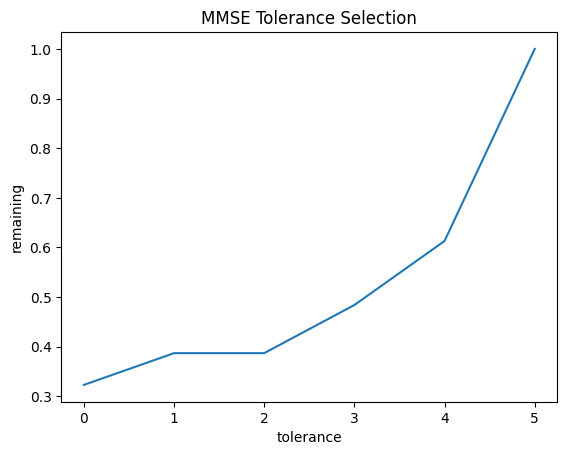

In [ ]:
import pandas as pd
import numpy as np
import ast
import os
from preprocessing import impute_gds,time_series_slicer,m_impute,convert_to_real_nan
from functools import reduce

# TESTING CODE Part 1
# file= "5visit_MCI_AD.csv"
# vars=["TOBAC30", "BILLS", 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL']

# df = pd.read_csv(file)
# df['GDS']=df['GDS'].apply(lambda x: eval(x.replace("nan", "np.nan"))).apply(impute_gds)
# for v in vars:
#     df[v]=df[v].apply(lambda x: eval(x.replace("nan", "np.nan"))).apply(m_impute)    
# df.to_csv(file, index=False)


# # TESTING CODE Part 2
# file ='8visit_combined.csv'
# path ='8visit_combined_1.csv'
# df = pd.read_csv(file)
# time_series_slicer(0, df, 5).to_csv(file, index=False)
# time_series_slicer(1, df, 5).to_csv(path, index=False)

import matplotlib.pyplot as plt
# TESTING CODE Part 3
df_1=[]
df_0=[]
for visit_num in range(6,11):
    df = pd.read_csv('Raw_Cohorts/' + str(visit_num) + 'visit_combined.csv', header=0)
    df_0.append(time_series_slicer(0, df, 5))
    # df_1.append(time_series_slicer(1, df, 5))

# merge dfs in the same list
merged_0 = pd.concat(df_0, axis=0, ignore_index=True)
# merged_1 = pd.concat(df_1, axis=0, ignore_index=True)

# merged_0.to_csv('slicer_test_0.csv', index=False)
# merged_1.to_csv('slicer_test_1.csv', index=False)
print("Unprocessed visit 6-10:")
# print("# of samples eligible in class 1: "+ str(len(merged_1)))
print("# of samples eligible in class 0: "+ str(len(merged_0)))
total=len(merged_0)
nan_counts=[]
for l in merged_0['MMSE']:
    nan_counts.append(np.sum(np.isnan(l[0:5])))

x=[]
y=[]
for i in range(0,6):
    x.append(i)
    y.append(round(sum(1 for a in nan_counts if a<=i)/float(total),3))

print(sum(1 for a in nan_counts if a<=1))
plt.plot(x, y)
plt.xlabel("tolerance") 
plt.ylabel("remaining")
plt.title("MMSE Tolerance Selection")
plt.show()


# # 1st copy of TESTING CODE Part 3
# df_1=[]
# df_0=[]
# for visit_num in range(6,11):
#     df = pd.read_csv('Dataset_1/' + str(visit_num) + 'visit_combined.csv', header=0)
#     df_0.append(time_series_slicer(0, df, 5))
#     df_1.append(time_series_slicer(1, df, 5))

# # merge dfs in the same list
# merged_0 = pd.concat(df_0, axis=0, ignore_index=True)
# merged_1 = pd.concat(df_1, axis=0, ignore_index=True)

# # merged_0.to_csv('slicer_test_0.csv', index=False)
# # merged_1.to_csv('slicer_test_1.csv', index=False)
# print("\nProcessed visit 6-10 from dataset_1:")
# print("# of samples eligible in class 1: "+ str(len(merged_1)))
# print("# of samples eligible in class 0: "+ str(len(merged_0)))

# 2nd COPY OF TESTING CODE Part 3
# df_1=[]
# df_0=[]
# for visit_num in range(11,20):
#     df = pd.read_csv('Raw_Cohorts/' + str(visit_num) + 'visit_combined.csv', header=0)
#     # df_0.append(time_series_slicer(0, df, 5))
#     df_1.append(time_series_slicer(1, df, 5))

# # merge dfs in the same list
# # merged_0 = pd.concat(df_0, axis=0, ignore_index=True)
# merged_1 = pd.concat(df_1, axis=0, ignore_index=True)
# total=len(merged_1)

# # merged_0.to_csv('slicer_test_0.csv', index=False)
# # merged_1.to_csv('slicer_test_1.csv', index=False)
# print("Unprocessed visit 11-19:")
# print("# of samples eligible in class 1: "+ str(total))
# # print("# of samples eligible in class 0: "+ str(len(merged_0)))


# nan_counts=[]
# for l in merged_1['MMSE']:
#     nan_counts.append(np.sum(np.isnan(l)))

# x=[]
# y=[]
# for i in range(3,9):
#     x.append(i)
#     y.append(round(sum(1 for a in nan_counts if a<=i)/float(total),3))

# plt.plot(x, y)
# plt.xlabel("tolerance") 
# plt.ylabel("remaining")
# plt.title("MMSE Tolerance Selection")
# plt.show()




Code used to generate Dataset_2: 
    Adds hearing and vision. 
    Performs categorical longitudinal variables, BMI, GDS, and CDR imputation (no MMSE imputation).
    Includes additional samples sliced from the 6-19 visits datasets in the new 5 visits dataset.

In [1]:
import pandas as pd
import numpy as np
import ast
import os
from preprocessing import impute_gds,time_series_slicer,m_impute,convert_to_real_nan, create_hv
import json

# helper function: impute GDS and categorical longitudinals
def impute(df):
    vars=["TOBAC30", "BILLS", 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL',
      'HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR']
    df['GDS']=df['GDS'].apply(lambda x: eval(x.replace("nan", "np.nan")) if isinstance(x, str) else x).apply(impute_gds)
    for v in vars:
        df[v]=df[v].apply(lambda x: eval(x.replace("nan", "np.nan")) if isinstance(x, str) else x).apply(m_impute) 
    return df   

# helper function: split dataset into MCI/AD NP group and the rest group.
def split(df):
    eligible_ind = []
    for i,(ind,r) in enumerate(df.iterrows()):
        # keep non-progressor with only label 1
        progression = r['Progression']
        if isinstance(progression, str):
            # Convert the string representation of the list to an actual list
            progression = eval(progression)
        if (not 0 in progression) and (not 2 in progression): eligible_ind.append(i)
    
    df0 = df.iloc[eligible_ind]
    df = df.drop(df.index[eligible_ind])
    return df, df0

starting_dir = 'Raw_Cohorts'
destination_dir = 'Dataset_2'
bmi_dropped_values = {}
mmse_dropped_values = {}
gds_cleaned = {}
# NO MMSE imputation. No longer needed.
# covariate_columns = ['EDUC', 'GDS', 'CDR', 'TOBAC30', 'BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL','hearing','vision']

def convert_to_real_nan(row):
    try:
        # Ensure it's a valid list format
        row = row.replace("nan", "null")  # Replace 'nan' string with 'null' for JSON compatibility
        values = json.loads(row)  # Parse JSON-formatted string into a list

        # Convert 'None' (from JSON) into np.nan for numerical operations
        return [np.nan if x is None else float(x) for x in values]
    
    except (ValueError, TypeError, json.JSONDecodeError):
        return row  # If it can't be converted, return the original
    
def clean_gds_column(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 88] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_tobaco(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_faq(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9, 8] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
    
file_11_19=[]
for visit_num in range(11,20):
    file_11_19.append(str(visit_num) + 'visit_combined.csv')

file_6_10=[]
for visit_num in range(6,11):
    file_6_10.append(str(visit_num) + 'visit_combined.csv')

new_5visit_CN_MCI=pd.DataFrame()
new_5visit_MCI_AD=pd.DataFrame()
    
root = starting_dir
files=[]
for visit_num in range(2,20):
    files.append(str(visit_num) + 'visit_combined.csv')

for file in files:
    if file.endswith('.csv'):
        print(f"now loading: {file}")
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        
        # Convert columns to real lists of floats
        df['BMI'] = df['BMI'].apply(convert_to_real_nan)
        df['MMSE'] = df['MMSE'].apply(convert_to_real_nan)
        
        # Count rows where all BMI entries are NaN
        initial_count = len(df)
        df = df[df['BMI'].apply(lambda x: not all(pd.isna(x)) if isinstance(x, list) else True)]
        dropped_count = initial_count - len(df)
        bmi_dropped_values[file] = dropped_count
        ### Repeat for MMSE
        # First fully remove missing entries from 2,3 visits.
        if file in ['2visit_combined.csv', '3visit_combined.csv']:
            initial_count = len(df)
            df = df[df['MMSE'].apply(lambda x: all(not pd.isna(val) for val in x) if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow one missing entry for 4,5 visits.
        elif file in ['4visit_combined.csv','5visit_combined.csv']:
            initial_count = len(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 1 if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count           
        # Allow two missing entries for 6,7 visits.
        elif file in ['6visit_combined.csv', '7visit_combined.csv']:
            initial_count = len(df)
            # take df0, MCI_AD NP, out to allow special rule
            df, df0 = split(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 2 if isinstance(x, list) else True)]
            if len(df0)!=0:
                # having 1 or less missing in the first 5 visits is permitted for df0
                df0 = df0[df0['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 2 or sum(pd.isna(v) for v in x[0:5]) <=1 if isinstance(x, list) else True)]
                # add df0 back to df to be imputed together later
                df = pd.concat([df, df0], axis=0)
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow three missing entries for 8,9 visits.
        elif file in ['8visit_combined.csv', '9visit_combined.csv']:
            initial_count = len(df)
            df, df0 = split(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 if isinstance(x, list) else True)]
            if len(df0)!=0:
                # having 1 or less missing in the first 5 visits is permitted for df0
                df0 = df0[df0['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 or sum(pd.isna(v) for v in x[0:5]) <=1 if isinstance(x, list) else True)]
                # add df0 back to df to be imputed together later
                df = pd.concat([df, df0], axis=0)
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow four missing entries for 10 visits.
        elif file in ['10visit_combined.csv']:
            initial_count = len(df)
            df, df0 = split(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 4 if isinstance(x, list) else True)]
            if len(df0)!=0:
                # having 1 or less missing in the first 5 visits is permitted for df0
                df0 = df0[df0['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 4 or sum(pd.isna(v) for v in x[0:5]) <=1 if isinstance(x, list) else True)]
                # add df0 back to df to be imputed together later
                df = pd.concat([df, df0], axis=0)
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow five missing entries for 10+ visits.
        else:
            initial_count = len(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 5 if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Convert all 88 and -4 entries in each row of GDS column to NAN
        df['GDS'] = df['GDS'].apply(clean_gds_column)
        #Clean tobac 30
        df['TOBAC30'] = df['TOBAC30'].apply(clean_tobaco)
        #Clean FAQ
        for col in df.columns[12:22]:  # Columns 13-22 (0-based index)
            df[col] = df[col].apply(clean_faq)
        ### Hearing and Vision Cleaning
        for col in ['HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR']:
            df[col] = df[col].apply(clean_faq)

        # MMSE imputation: SKIPPED. To be done in grid search.
        # df = impute_mmse(df, covariate_columns)

        # Done if all samples were dropped
        if df.empty: 
            print(f"Skipping {file}: no rows left after filtering") 
            continue

        # for 11-19 visits, keep only CN/MCI Progressors
        if file in file_11_19:
            eligible_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # keep progressors with label 0 and 1
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) and (1 in progression): eligible_ind.append(i)
            df = df.iloc[eligible_ind]

        impute(df)
        create_hv(df)

        # Drop columns HEARING, HEARWAID, HEARAID, VISION, VISCORR, VISWCORR 
        df.drop(columns=['HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR'], inplace=True, errors='ignore')
        # drop first column
        df.drop(df.columns[0], axis=1, inplace=True)
        
        # save new datasets by group
        if file == '2visit_combined.csv':
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            df.iloc[CN_MCI_ind].to_csv(os.path.join(destination_dir, '2visit_CN_MCI.csv'), index=False)
            df.drop(df.index[CN_MCI_ind]).to_csv(os.path.join(destination_dir, '2visit_MCI_AD.csv'), index=False)
        elif file == '3visit_combined.csv':
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            df.iloc[CN_MCI_ind].to_csv(os.path.join(destination_dir, '3visit_CN_MCI.csv'), index=False)
            df.drop(df.index[CN_MCI_ind]).to_csv(os.path.join(destination_dir, '3visit_MCI_AD.csv'), index=False)
        elif file == '4visit_combined.csv':
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            df.iloc[CN_MCI_ind].to_csv(os.path.join(destination_dir, '4visit_CN_MCI.csv'), index=False)
            df.drop(df.index[CN_MCI_ind]).to_csv(os.path.join(destination_dir, '4visit_MCI_AD.csv'), index=False)
        elif file in ['5visit_combined.csv']:
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            new_5visit_CN_MCI = df.iloc[CN_MCI_ind]
            new_5visit_MCI_AD = df.drop(df.index[CN_MCI_ind])

            new_5visit_CN_MCI.to_csv(os.path.join(destination_dir, 'original_5visit_CN_MCI.csv'), index=False)
            new_5visit_MCI_AD.to_csv(os.path.join(destination_dir, 'original_5visit_MCI_AD.csv'), index=False)

        elif file in file_6_10:
            # add eligible minority to each class
            new_5visit_CN_MCI = pd.concat([new_5visit_CN_MCI, time_series_slicer(1,df,5)], axis=0)
            new_5visit_MCI_AD = pd.concat([new_5visit_MCI_AD, time_series_slicer(0,df,5)], axis=0)

        elif file in file_11_19:
            # add eligible minority to CN_MCI (since no MCI_AD NP in 11-19)
            new_5visit_CN_MCI = pd.concat([new_5visit_CN_MCI, time_series_slicer(1,df,5)], axis=0)

# Save the updated 5 visit datasets to the destination directory
os.makedirs(destination_dir, exist_ok=True)
new_5visit_CN_MCI.to_csv(os.path.join(destination_dir, '5visit_CN_MCI.csv'), index=False)
new_5visit_MCI_AD.to_csv(os.path.join(destination_dir, '5visit_MCI_AD.csv'), index=False)

# Print the dropped values summary
print("Dropped values summary:")
for file, count in bmi_dropped_values.items():
    print(f"{file}: {count} rows dropped for BMI")
for file, count in mmse_dropped_values.items():
    print(f"{file}: {count} rows dropped for MMSE")
    #print("100 dropped for MMSE")

now loading: 2visit_combined.csv
now loading: 3visit_combined.csv
now loading: 4visit_combined.csv
now loading: 5visit_combined.csv
now loading: 6visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 7visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 8visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 9visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 10visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 11visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 12visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 13visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 14visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 15visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 16visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 17visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 18visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 19visit_combined.csv
Skipping 19visit_combined.csv: no rows left after filtering
Dropped values summary:
2visit_combined.csv: 187 rows dropped for BMI
3visit_combined.csv: 76 rows dropped for BMI
4visit_combined.csv: 39 rows dropped for BMI
5visit_combined.csv: 27 rows dropped for BMI
6visit_combined.csv: 24 rows dropped for BMI
7visit_combined.csv: 11 rows dropped for BMI
8visit_combined.csv: 14 rows dropped for BMI
9visit_combined.csv: 12 rows dropped for BMI
10visit_combined.csv: 5 rows dropped for BMI
11visit_combined.csv: 6 rows dropped for BMI
12visit_combined.csv: 8 rows dropped for BMI
13visit_combined.csv: 2 rows dropped for BMI
14visit_combined.csv: 1 rows dropped for BMI
15visit_combined.csv: 0 rows dropped for BMI
16visit_combined.csv: 0 rows dropped for BMI
17visit_combined.csv: 0 rows dropped for BMI
18visit_combined.csv: 0 rows dropped for BMI
19visit_combined.csv: 0 rows dropped for BMI
2visit_combined.csv: 2043 rows dropped for MMSE
3visit_combined.csv: 12

Code used to generate Dataset_2_clean: 
    Cleans all vars by replacing -4,8,9,... with nan.
    Adds hearing and vision without imputing the precursors. 
    Includes additional samples sliced from the 6-19 visits datasets in the new 5 visits dataset.

In [2]:
import pandas as pd
import numpy as np
import ast
import os
from preprocessing import time_series_slicer,convert_to_real_nan, create_hv
import json

# NO IMPUTATION
# helper function: impute GDS and categorical longitudinals
# def impute(df):
#     vars=["TOBAC30", "BILLS", 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL',
#       'HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR']
#     df['GDS']=df['GDS'].apply(lambda x: eval(x.replace("nan", "np.nan")) if isinstance(x, str) else x).apply(impute_gds)
#     for v in vars:
#         df[v]=df[v].apply(lambda x: eval(x.replace("nan", "np.nan")) if isinstance(x, str) else x).apply(m_impute) 
#     return df   

# helper function: split dataset into MCI/AD NP group and the rest group.
def split(df):
    eligible_ind = []
    for i,(ind,r) in enumerate(df.iterrows()):
        # keep non-progressor with only label 1
        progression = r['Progression']
        if isinstance(progression, str):
            # Convert the string representation of the list to an actual list
            progression = eval(progression)
        if (not 0 in progression) and (not 2 in progression): eligible_ind.append(i)
    
    df0 = df.iloc[eligible_ind]
    df = df.drop(df.index[eligible_ind])
    return df, df0

starting_dir = 'Raw_Cohorts'
destination_dir = 'Dataset_2_clean'
bmi_dropped_values = {}
mmse_dropped_values = {}
gds_cleaned = {}
# covariate_columns = ['EDUC', 'GDS', 'CDR', 'TOBAC30', 'BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS', 'PAYATTN', 'REMDATES', 'TRAVEL','hearing','vision']

def convert_to_real_nan(row):
    try:
        # Ensure it's a valid list format
        row = row.replace("nan", "null")  # Replace 'nan' string with 'null' for JSON compatibility
        values = json.loads(row)  # Parse JSON-formatted string into a list

        # Convert 'None' (from JSON) into np.nan for numerical operations
        return [np.nan if x is None else float(x) for x in values]
    
    except (ValueError, TypeError, json.JSONDecodeError):
        return row  # If it can't be converted, return the original
    
def clean_gds_column(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 88] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_tobaco(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
def clean_faq(row):
    try:
        # Ensure the row is a valid list
        if isinstance(row, str):
            row = ast.literal_eval(row)  # Convert string to list
        return [np.nan if val in [-4, 9, 8] else val for val in row] if isinstance(row, list) else row
    except (ValueError, SyntaxError):
        return row  # Return as-is if parsing fails
    
file_11_19=[]
for visit_num in range(11,20):
    file_11_19.append(str(visit_num) + 'visit_combined.csv')

file_6_10=[]
for visit_num in range(6,11):
    file_6_10.append(str(visit_num) + 'visit_combined.csv')

new_5visit_CN_MCI=pd.DataFrame()
new_5visit_MCI_AD=pd.DataFrame()
    
root = starting_dir
files=[]
for visit_num in range(2,20):
    files.append(str(visit_num) + 'visit_combined.csv')

for file in files:
    if file.endswith('.csv'):
        print(f"now loading: {file}")
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        
        # Convert columns to real lists of floats
        df['BMI'] = df['BMI'].apply(convert_to_real_nan)
        df['MMSE'] = df['MMSE'].apply(convert_to_real_nan)
        
        # Count rows where all BMI entries are NaN
        initial_count = len(df)
        df = df[df['BMI'].apply(lambda x: not all(pd.isna(x)) if isinstance(x, list) else True)]
        dropped_count = initial_count - len(df)
        bmi_dropped_values[file] = dropped_count
        ### Repeat for MMSE
        # First fully remove missing entries from 2,3 visits.
        if file in ['2visit_combined.csv', '3visit_combined.csv']:
            initial_count = len(df)
            df = df[df['MMSE'].apply(lambda x: all(not pd.isna(val) for val in x) if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow one missing entry for 4,5 visits.
        elif file in ['4visit_combined.csv','5visit_combined.csv']:
            initial_count = len(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 1 if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count           
        # Allow two missing entries for 6,7 visits.
        elif file in ['6visit_combined.csv', '7visit_combined.csv']:
            initial_count = len(df)
            # take df0, MCI_AD NP, out to allow special rule
            df, df0 = split(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 2 if isinstance(x, list) else True)]
            if len(df0)!=0:
                # having 1 or less missing in the first 5 visits is permitted for df0
                df0 = df0[df0['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 2 or sum(pd.isna(v) for v in x[0:5]) <=1 if isinstance(x, list) else True)]
                # add df0 back to df to be imputed together
                df = pd.concat([df, df0], axis=0)
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow three missing entries for 8,9 visits.
        elif file in ['8visit_combined.csv', '9visit_combined.csv']:
            initial_count = len(df)
            df, df0 = split(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 if isinstance(x, list) else True)]
            if len(df0)!=0:
                df0 = df0[df0['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 3 or sum(pd.isna(v) for v in x[0:5]) <=1 if isinstance(x, list) else True)]
                df = pd.concat([df, df0], axis=0)
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow four missing entries for 10 visits.
        elif file in ['10visit_combined.csv']:
            initial_count = len(df)
            df, df0 = split(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 4 if isinstance(x, list) else True)]
            if len(df0)!=0:
                df0 = df0[df0['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 4 or sum(pd.isna(v) for v in x[0:5]) <=1 if isinstance(x, list) else True)]
                df = pd.concat([df, df0], axis=0)
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Allow five missing entries for 10+ visits.
        else:
            initial_count = len(df)
            df = df[df['MMSE'].apply(lambda x: sum(pd.isna(val) for val in x) <= 5 if isinstance(x, list) else True)]
            dropped_count = initial_count - len(df)
            mmse_dropped_values[file] = dropped_count
        # Convert all 88 and -4 entries in each row of GDS column to NAN
        df['GDS'] = df['GDS'].apply(clean_gds_column)
        #Clean tobac 30
        df['TOBAC30'] = df['TOBAC30'].apply(clean_tobaco)
        #Clean FAQ
        for col in df.columns[12:22]:  # Columns 13-22 (0-based index)
            df[col] = df[col].apply(clean_faq)
        ### Hearing and Vision Cleaning
        for col in ['HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR']:
            df[col] = df[col].apply(clean_faq)

        if df.empty: 
            print(f"Skipping {file}: no rows left after filtering") 
            continue

        # MMSE imputation
        # df = impute_mmse(df, covariate_columns)

        # for 11-19 visits, keep only CN/MCI Progressors
        if file in file_11_19:
            eligible_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # keep progressors with label 0 and 1
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) and (1 in progression): eligible_ind.append(i)
            df = df.iloc[eligible_ind]

        # impute(df)
        create_hv(df)

        # Drop columns HEARING, HEARWAID, HEARAID, VISION, VISCORR, VISWCORR 
        df.drop(columns=['HEARING', 'HEARWAID', 'HEARAID', 'VISION', 'VISCORR', 'VISWCORR'], inplace=True, errors='ignore')
        # drop first column
        df.drop(df.columns[0], axis=1, inplace=True)
        
        # save new datasets by group
        if file == '2visit_combined.csv':
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            df.iloc[CN_MCI_ind].to_csv(os.path.join(destination_dir, '2visit_CN_MCI.csv'), index=False)
            df.drop(df.index[CN_MCI_ind]).to_csv(os.path.join(destination_dir, '2visit_MCI_AD.csv'), index=False)
        elif file == '3visit_combined.csv':
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            df.iloc[CN_MCI_ind].to_csv(os.path.join(destination_dir, '3visit_CN_MCI.csv'), index=False)
            df.drop(df.index[CN_MCI_ind]).to_csv(os.path.join(destination_dir, '3visit_MCI_AD.csv'), index=False)
        elif file == '4visit_combined.csv':
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            df.iloc[CN_MCI_ind].to_csv(os.path.join(destination_dir, '4visit_CN_MCI.csv'), index=False)
            df.drop(df.index[CN_MCI_ind]).to_csv(os.path.join(destination_dir, '4visit_MCI_AD.csv'), index=False)
        elif file in ['5visit_combined.csv']:
            os.makedirs(destination_dir, exist_ok=True)
            CN_MCI_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                # get CN_MCI sample indices by searching for 0 in progression vector
                progression = r['Progression']
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                if (0 in progression) : CN_MCI_ind.append(i)
            new_5visit_CN_MCI = df.iloc[CN_MCI_ind]
            new_5visit_MCI_AD = df.drop(df.index[CN_MCI_ind])

            new_5visit_CN_MCI.to_csv(os.path.join(destination_dir, 'original_5visit_CN_MCI.csv'), index=False)
            new_5visit_MCI_AD.to_csv(os.path.join(destination_dir, 'original_5visit_MCI_AD.csv'), index=False)

        elif file in file_6_10:
            # add eligible minority to each class
            new_5visit_CN_MCI = pd.concat([new_5visit_CN_MCI, time_series_slicer(1,df,5)], axis=0)
            new_5visit_MCI_AD = pd.concat([new_5visit_MCI_AD, time_series_slicer(0,df,5)], axis=0)

        elif file in file_11_19:
            # add eligible minority to CN_MCI (since no MCI_AD NP in 11-19)
            new_5visit_CN_MCI = pd.concat([new_5visit_CN_MCI, time_series_slicer(1,df,5)], axis=0)

# Save the updated 5 visit datasets to the destination directory
os.makedirs(destination_dir, exist_ok=True)
new_5visit_CN_MCI.to_csv(os.path.join(destination_dir, '5visit_CN_MCI.csv'), index=False)
new_5visit_MCI_AD.to_csv(os.path.join(destination_dir, '5visit_MCI_AD.csv'), index=False)

# Print the dropped values summary
print("Dropped values summary:")
for file, count in bmi_dropped_values.items():
    print(f"{file}: {count} rows dropped for BMI")
for file, count in mmse_dropped_values.items():
    print(f"{file}: {count} rows dropped for MMSE")
    #print("100 dropped for MMSE")

now loading: 2visit_combined.csv
now loading: 3visit_combined.csv
now loading: 4visit_combined.csv
now loading: 5visit_combined.csv
now loading: 6visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 7visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 8visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 9visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 10visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)
c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,

now loading: 11visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 12visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 13visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 14visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 15visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 16visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 17visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 18visit_combined.csv


c:\Users\lz000\OneDrive\Older Account\Desktop\AGE-ADAR\AD-Early-Prediction\preprocessing.py:229: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(target_file, header=0)


now loading: 19visit_combined.csv
Skipping 19visit_combined.csv: no rows left after filtering
Dropped values summary:
2visit_combined.csv: 187 rows dropped for BMI
3visit_combined.csv: 76 rows dropped for BMI
4visit_combined.csv: 39 rows dropped for BMI
5visit_combined.csv: 27 rows dropped for BMI
6visit_combined.csv: 24 rows dropped for BMI
7visit_combined.csv: 11 rows dropped for BMI
8visit_combined.csv: 14 rows dropped for BMI
9visit_combined.csv: 12 rows dropped for BMI
10visit_combined.csv: 5 rows dropped for BMI
11visit_combined.csv: 6 rows dropped for BMI
12visit_combined.csv: 8 rows dropped for BMI
13visit_combined.csv: 2 rows dropped for BMI
14visit_combined.csv: 1 rows dropped for BMI
15visit_combined.csv: 0 rows dropped for BMI
16visit_combined.csv: 0 rows dropped for BMI
17visit_combined.csv: 0 rows dropped for BMI
18visit_combined.csv: 0 rows dropped for BMI
19visit_combined.csv: 0 rows dropped for BMI
2visit_combined.csv: 2043 rows dropped for MMSE
3visit_combined.csv: 12

Dataset_2_no_reverter:
    For CN/MCI, dropping those labeled as 1-Progressor but diagnosed as 0-CN in the most recent visit.
    For MCI/AD, dropping those labeled as 1-Progressor but diagnosed as 1-MCI in the most recent visit.

    Saving those dropped samples separately in the same dataset.

In [3]:
import pandas as pd
import numpy as np
import os


starting_dir = 'Dataset_2'
destination_dir = 'Dataset_2_no_reverter'


for root, dirs, files in os.walk(starting_dir):
    for file in files:
        if file.endswith('MCI.csv'):
            # CN/MCI case
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            reverter_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                prog_ID = r['Prog_ID']
                progression = r['Progression']
                if isinstance(prog_ID, str):
                    # Convert the string representation to an actual int
                    prog_ID = eval(prog_ID)
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                
                # labeled as 1-Progressor but diagnosed as 0-CN in the most recent visit.
                if (prog_ID == 1) and (progression[-1]==0): reverter_ind.append(i)

            # print summary
            print(str(len(reverter_ind))+" samples dropped in "+str(file))
            dropped_data = df.iloc[reverter_ind]
            # Save the new DataFrame to the destination directory
            os.makedirs(destination_dir, exist_ok=True)
            cleaned_file_path = os.path.join(destination_dir, file)
            dropped_file_path = os.path.join(destination_dir, 'dropped_'+file)
            dropped_data.to_csv(dropped_file_path, index=False)
            df.drop(df.index[reverter_ind]).to_csv(cleaned_file_path, index=False)
        
        elif file.endswith('AD.csv'):
            # MCI/AD case
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            reverter_ind = []
            for i, (ind ,r) in enumerate(df.iterrows()):
                prog_ID = r['Prog_ID']
                progression = r['Progression']
                if isinstance(prog_ID, str):
                    # Convert the string representation to an actual int
                    prog_ID = eval(prog_ID)
                if isinstance(progression, str):
                    # Convert the string representation of the list to an actual list
                    progression = eval(progression)
                
                # labeled as 1-Progressor but diagnosed as 1-MCI in the most recent visit.
                if (prog_ID == 1) and (progression[-1]==1): reverter_ind.append(i)
                
            # print summary
            print(str(len(reverter_ind))+" samples dropped in "+str(file))
            dropped_data = df.iloc[reverter_ind]
            dropped_data = df.iloc[reverter_ind]
            # Save the new DataFrame to the destination directory
            os.makedirs(destination_dir, exist_ok=True)
            cleaned_file_path = os.path.join(destination_dir, file)
            dropped_file_path = os.path.join(destination_dir, 'dropped_'+file)
            dropped_data.to_csv(dropped_file_path, index=False)
            df.drop(df.index[reverter_ind]).to_csv(cleaned_file_path, index=False)

0 samples dropped in 2visit_CN_MCI.csv
0 samples dropped in 2visit_MCI_AD.csv
13 samples dropped in 3visit_CN_MCI.csv
7 samples dropped in 3visit_MCI_AD.csv
16 samples dropped in 4visit_CN_MCI.csv
14 samples dropped in 4visit_MCI_AD.csv
18 samples dropped in 5visit_CN_MCI.csv
6 samples dropped in 5visit_MCI_AD.csv
7 samples dropped in original_5visit_CN_MCI.csv
6 samples dropped in original_5visit_MCI_AD.csv


Survey of new samples potentially eligible for Dataset_3:
    generate a list of IDs for each of 2-5 and 5+ visits for each of the two progression trends:
    CN => MCI => AD and CN => AD

In [4]:
import pandas as pd
import numpy as np
import os

destination_dir = 'Dataset_3'
df = pd.read_csv("old/response_combinations.csv")
# remove samples with unknown diagnoses at any time point
df = df[~df['Responses'].apply(lambda x: 'Unknown' in x)]

count = np.zeros((5, 2), dtype=int)
l0 = [[] for _ in range(5)]
l1 = [[] for _ in range(5)]

# convert to real lists
df['Responses']=df['Responses'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['NACCID']=df['NACCID'].apply(lambda x: eval(x) if isinstance(x, str) else x)

for a, row in df.iterrows():
    length = len(row['Responses'])
    # must include CN and AD in diagnoses and end as a progressor (not ending with CN)
    if any(x=='CN' for x in row['Responses']) and any(x=='AD' for x in row['Responses']) and not row['Responses'][length-1]=='CN':
        if any(x=='MCI' for x in row['Responses']):
            # CN => MCI => AD group
            if (length > 5):
                # 5+ visits
                l0[4].extend(row['NACCID'])
                count[4][0]+=row['Counts']
            else:
                # 2-5 visits
                l0[length-2].extend(row['NACCID'])
                count[length-2][0]+=row['Counts']

        else:
            # CN => AD group
            if (length > 5):
                # 5+ visits
                l1[4].extend(row['NACCID'])
                count[4][1]+=row['Counts']
            else:
                # 2-5 visits
                l1[length-2].extend(row['NACCID'])
                count[length-2][1]+=row['Counts']

# save and report the results
for i in range(0,4):
    file_path = os.path.join(destination_dir, str(i+2)+'visit_CN_MCI_AD.txt')
    with open(file_path, "w") as f: f.write(str(l0[i]))
    print(str(i+2)+'visit_CN_MCI_AD count: '+str(count[i][0]))

with open("5+_visit_CN_MCI_AD.txt", "w") as f: f.write(str(l0[4]))
print('5+_visit_CN_MCI_AD count: '+str(count[4][0])+'\n')

for i in range(0,4):
    file_path = os.path.join(destination_dir, str(i+2)+'visit_CN_AD.txt')
    with open(file_path, "w") as f: f.write(str(l1[i]))
    print(str(i+2)+'visit_CN_AD count: '+str(count[i][1]))

with open("5+_visit_CN_AD.txt", "w") as f: f.write(str(l1[4]))
print('5+_visit_CN_AD count: '+str(count[4][1]))

2visit_CN_MCI_AD count: 0
3visit_CN_MCI_AD count: 43
4visit_CN_MCI_AD count: 66
5visit_CN_MCI_AD count: 66
5+_visit_CN_MCI_AD count: 454

2visit_CN_AD count: 135
3visit_CN_AD count: 192
4visit_CN_AD count: 185
5visit_CN_AD count: 198
5+_visit_CN_AD count: 1057
